# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Yehezkiel Stephanus Austin
- **Email:** yehezkiel.stephanus@gmail.com
- **ID Dicoding:** yehezkiel_saragih

## Menentukan Pertanyaan Bisnis

- Bagaimana persebaran pelanggan berdasarkan kota dan negara bagian?
- Siapa pelanggan yang paling banyak melakukan order dan mengeluarkan uang untuk order tersebut?
- Bagaimana persebaran pelanggan yang memiliki dampak terhadap order?
- Bagaimana persebaran penjual berdasarkan kota dan negara bagian?
- Siapa penjual yang paling banyak mendapatkan order dan mendapatkan uang untuk order tersebut?
- Apa produk dan kategori produk yang paling banyak mendapatkan order serta menghasilkan uang untuk order tersebut?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [2]:
customer_df = pd.read_csv("data/customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_item_df = pd.read_csv("data/order_items_dataset.csv")
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payment_df = pd.read_csv("data/order_payments_dataset.csv")
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_review_df = pd.read_csv("data/order_reviews_dataset.csv")
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
order_df = pd.read_csv("data/orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
product_df = pd.read_csv("data/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
seller_df = pd.read_csv("data/sellers_dataset.csv")
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

To answer the bussiness questions, the analysis proccess will utilize customer, order item, order payment, order review, order, product category, product, and seller dataframe. 

To streamline the analysis, all these datasets will be merged into a unified dataframe. 

Assesing Data will involve combining the entire dataset, considering the required columns, and examining data types, missing values, and duplicated data.

#### Customer Joined (Customer and Orders)

In [11]:
# Right join customer_df and order_df
customer_joined_df = pd.merge(
    left = customer_df, 
    right = order_df, 
    how = "right",
    on = "customer_id"
)

In [12]:
# Check dataframe info
customer_joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    99441 non-null  object
 1   customer_unique_id             99441 non-null  object
 2   customer_zip_code_prefix       99441 non-null  int64 
 3   customer_city                  99441 non-null  object
 4   customer_state                 99441 non-null  object
 5   order_id                       99441 non-null  object
 6   order_status                   99441 non-null  object
 7   order_purchase_timestamp       99441 non-null  object
 8   order_approved_at              99281 non-null  object
 9   order_delivered_carrier_date   97658 non-null  object
 10  order_delivered_customer_date  96476 non-null  object
 11  order_estimated_delivery_date  99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.1+ MB


The analysis process will exclude the use of the customer zip code prefix and order estimated delivery date column.

In [13]:
customer_joined_df["order_status"].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

The analysis process will exclude the use of canceled and unavailable order status row.

Order purchase timestamp, order approved at, order delivered carrier date, order delivered customer date, and order estimated delivery date column need to be converted to datetime format.

In [14]:
# Check missing values
customer_joined_df.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

NaN values are not a major issue because they are normal occurrences caused by differences in order status.

In [15]:
# Check duplicated data
print(f"Customer joined duplicated data: {customer_joined_df.duplicated().sum()}")

Customer joined duplicated data: 0


In [16]:
# Print dataframe
print(f"Customer joined shape: {customer_joined_df.shape}")
customer_joined_df.head()

Customer joined shape: (99441, 12)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Seller Joined (Seller, Order Item, Product, and Product Category)

In [17]:
# Left join seller_df, order_item_df, product_df, and product_category_df
seller_joined_df = pd.merge(
    left = pd.merge(  
        left = seller_df,
        right = order_item_df,
        how = "right", 
        on = "seller_id"
    ),
    right = pd.merge(
        left=product_df,
        right=product_category_df,
        how = "left", 
        left_on = "product_category_name",
        right_on = "product_category_name"
    ),
    how = "left",
    on = "product_id"
)

#### Order Joined (Seller Joined and Order Review)

In [18]:
# Left join seller_joined_df and order_review_df
order_joined_df = pd.merge(
    left = seller_joined_df,
    right = order_review_df,
    how = "left",
    on = "order_id"
)

In [19]:
# Check dataframe info
order_joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   seller_id                      113314 non-null  object 
 1   seller_zip_code_prefix         113314 non-null  int64  
 2   seller_city                    113314 non-null  object 
 3   seller_state                   113314 non-null  object 
 4   order_id                       113314 non-null  object 
 5   order_item_id                  113314 non-null  int64  
 6   product_id                     113314 non-null  object 
 7   shipping_limit_date            113314 non-null  object 
 8   price                          113314 non-null  float64
 9   freight_value                  113314 non-null  float64
 10  product_category_name          111702 non-null  object 
 11  product_name_lenght            111702 non-null  float64
 12  product_description_lenght    

The analysis process will exclude the use of seller zip code prefix, product name length, product description length, product photo qty, product weight g, product length cm, produch height cm, product width cm, review comment title, and review comment message.

Shipping limit date, review creation date, and review answer timestamp column need to be converted to datetime format.

In [20]:
# Check missing values
order_joined_df.isna().sum()

seller_id                            0
seller_zip_code_prefix               0
seller_city                          0
seller_state                         0
order_id                             0
order_item_id                        0
product_id                           0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name             1612
product_name_lenght               1612
product_description_lenght        1612
product_photos_qty                1612
product_weight_g                    18
product_length_cm                   18
product_height_cm                   18
product_width_cm                    18
product_category_name_english     1636
review_id                          942
review_score                       942
review_comment_title             99880
review_comment_message           65672
review_creation_date               942
review_answer_timestamp            942
dtype: int64

In [21]:
order_joined_df.product_category_name.loc[order_joined_df.product_category_name_english.isna() & order_joined_df.product_category_name.notnull()].unique()

array(['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'],
      dtype=object)

The missing values in the product category name english column should be addressed by translating the corresponding product category name and filling in "other" for products that do not have a category.

The missing values in review id, review score, review creation date, and review answer timestamp are not a major issue because not all order will have review.

In [22]:
# Check duplicated data
print(f"Order joined duplicated data: {order_joined_df.duplicated().sum()}")

Order joined duplicated data: 0


### Cleaning Data

#### Customer Joined

In [23]:
# Drop unnecessary columns
customer_joined_df.drop(
    columns = [
        "customer_zip_code_prefix",
        "order_estimated_delivery_date"
    ],
    inplace = True
)
# Drop canceled order status and unavailable order status
customer_joined_df = customer_joined_df.loc[customer_joined_df.order_status != "canceled"]
customer_joined_df = customer_joined_df.loc[customer_joined_df.order_status != "unavailable"]

In [24]:
# Fix data types
columns_to_fix = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"]
for column in columns_to_fix:
    customer_joined_df[column] = pd.to_datetime(customer_joined_df[column])

In [25]:
# Check dataframe info
customer_joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98207 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    98207 non-null  object        
 1   customer_unique_id             98207 non-null  object        
 2   customer_city                  98207 non-null  object        
 3   customer_state                 98207 non-null  object        
 4   order_id                       98207 non-null  object        
 5   order_status                   98207 non-null  object        
 6   order_purchase_timestamp       98207 non-null  datetime64[ns]
 7   order_approved_at              98188 non-null  datetime64[ns]
 8   order_delivered_carrier_date   97583 non-null  datetime64[ns]
 9   order_delivered_customer_date  96470 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(6)
memory usage: 8.2+ MB


In [26]:
# Check missing values
customer_joined_df.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  19
order_delivered_carrier_date      624
order_delivered_customer_date    1737
dtype: int64

In [27]:
# Print
print(f"Customer joined shape: {customer_joined_df.shape}")
customer_joined_df.head()

Customer joined shape: (98207, 10)


,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02


#### Order Joined

In [28]:
# Drop unnecessary columns
order_joined_df.drop(
    columns = [
        "seller_zip_code_prefix",
        "product_name_lenght",
        "product_description_lenght",
        "product_photos_qty",
        "product_weight_g",
        "product_length_cm",
        "product_height_cm",
        "product_width_cm",
        "review_comment_title",
        "review_comment_message"
    ],
    inplace = True
)

In [29]:
# Fix data types
columns_to_fix = ["shipping_limit_date", "review_creation_date", "review_answer_timestamp"]
for column in columns_to_fix:
    order_joined_df[column] = pd.to_datetime(order_joined_df[column])

In [30]:
# Fix missing values in product category name english
for i in list(order_joined_df.loc[order_joined_df.product_category_name_english.isna()].index):
    if order_joined_df["product_category_name"].iloc[i] == "pc_gamer":
        order_joined_df["product_category_name_english"].iloc[i] = "pc_gaming"
    elif order_joined_df["product_category_name"].iloc[i] == "portateis_cozinha_e_preparadores_de_alimentos":
        order_joined_df["product_category_name_english"].iloc[i] = "portable_kitchen_and_food_preparers"
    else:
        order_joined_df["product_category_name_english"].iloc[i] = "other"
# Drop product category name
order_joined_df.drop(columns=["product_category_name"], inplace=True)

In [31]:
# Check dataframe info
order_joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   seller_id                      113314 non-null  object        
 1   seller_city                    113314 non-null  object        
 2   seller_state                   113314 non-null  object        
 3   order_id                       113314 non-null  object        
 4   order_item_id                  113314 non-null  int64         
 5   product_id                     113314 non-null  object        
 6   shipping_limit_date            113314 non-null  datetime64[ns]
 7   price                          113314 non-null  float64       
 8   freight_value                  113314 non-null  float64       
 9   product_category_name_english  113314 non-null  object        
 10  review_id                      112372 non-null  object        
 11  

In [32]:
# Check missing values
order_joined_df.isna().sum()

seller_id                          0
seller_city                        0
seller_state                       0
order_id                           0
order_item_id                      0
product_id                         0
shipping_limit_date                0
price                              0
freight_value                      0
product_category_name_english      0
review_id                        942
review_score                     942
review_creation_date             942
review_answer_timestamp          942
dtype: int64

In [33]:
# Print
print(f"Order joined shape: {order_joined_df.shape}")
order_joined_df.head()

Order joined shape: (113314, 14)


,seller_id,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name_english,review_id,review_score,review_creation_date,review_answer_timestamp
0,48436dade18ac8b2bce089ec2a041202,volta redonda,SP,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,13.29,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5.0,2017-09-21,2017-09-22 10:57:03
1,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,SP,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,239.90,19.93,pet_shop,7b07bacd811c4117b742569b04ce3580,4.0,2017-05-13,2017-05-15 11:34:13
2,5b51032eddd242adc84c38acab88f23d,borda da mata,MG,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,199.00,17.87,furniture_decor,0c5b33dea94867d1ac402749e5438e8b,5.0,2018-01-23,2018-01-23 16:06:31
3,9d7a1d34a5052409006425275ba1c2b4,franca,SP,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,12.99,12.79,perfumery,f4028d019cb58564807486a6aaf33817,4.0,2018-08-15,2018-08-15 16:39:01
4,df560393f3a51e74553ab94004ba5c87,loanda,PR,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,199.90,18.14,garden_tools,940144190dcba6351888cafa43f3a3a5,5.0,2017-03-02,2017-03-03 10:54:59


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) will make use of the combined dataframe, which includes both the customer joined and order joined dataframes.

### All

In [34]:
# Inner join customer_joined_df and order_joined_df
all_df = pd.merge(
    left=customer_joined_df,
    right=order_joined_df,
    how = "inner",
    left_on = "order_id",
    right_on = "order_id"
)

In [35]:
# Check dataframe info
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112761 entries, 0 to 112760
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112761 non-null  object        
 1   customer_unique_id             112761 non-null  object        
 2   customer_city                  112761 non-null  object        
 3   customer_state                 112761 non-null  object        
 4   order_id                       112761 non-null  object        
 5   order_status                   112761 non-null  object        
 6   order_purchase_timestamp       112761 non-null  datetime64[ns]
 7   order_approved_at              112746 non-null  datetime64[ns]
 8   order_delivered_carrier_date   112034 non-null  datetime64[ns]
 9   order_delivered_customer_date  110832 non-null  datetime64[ns]
 10  seller_id                      112761 non-null  object        
 11  

In [36]:
# Add new columns
all_df.insert(18, "order_value", all_df.price + all_df.freight_value)

In [37]:
# Check dataframe info
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112761 entries, 0 to 112760
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112761 non-null  object        
 1   customer_unique_id             112761 non-null  object        
 2   customer_city                  112761 non-null  object        
 3   customer_state                 112761 non-null  object        
 4   order_id                       112761 non-null  object        
 5   order_status                   112761 non-null  object        
 6   order_purchase_timestamp       112761 non-null  datetime64[ns]
 7   order_approved_at              112746 non-null  datetime64[ns]
 8   order_delivered_carrier_date   112034 non-null  datetime64[ns]
 9   order_delivered_customer_date  110832 non-null  datetime64[ns]
 10  seller_id                      112761 non-null  object        
 11  

In [38]:
# Check missing values
all_df.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date      727
order_delivered_customer_date    1929
seller_id                           0
seller_city                         0
seller_state                        0
order_item_id                       0
product_id                          0
shipping_limit_date                 0
price                               0
freight_value                       0
order_value                         0
product_category_name_english       0
review_id                         925
review_score                      925
review_creation_date              925
review_answer_timestamp           925
dtype: int64

In [39]:
# Save all_joined_df to csv
all_df.to_csv("data/all_dataset.csv", index=False)

### Explore Customer

In [40]:
# Order of customer cities by number of customers who did make transactions
customer_city = all_df[all_df["order_id"].isna() == False].groupby(by = "customer_city").customer_unique_id.nunique().sort_values(ascending = False).reset_index()
customer_city.head()

,customer_city,customer_unique_id
0,sao paulo,14761
1,rio de janeiro,6545
2,belo horizonte,2641
3,brasilia,2051
4,curitiba,1447


The highest number of customers comes from the city of Sao Paulo, totaling 14,761 individuals.

In [41]:
# Order of customer states by number of customers who did make transactions
customer_state = all_df[all_df["order_id"].isna() == False].groupby(by = "customer_state").customer_unique_id.nunique().sort_values(ascending = False).reset_index()
customer_state.head()

,customer_state,customer_unique_id
0,SP,39747
1,RJ,12241
2,MG,11134
3,RS,5233
4,PR,4824


The highest number of customers comes from the state of SP, totaling 39,747 individuals.

In [42]:
# Order of customer unique id by number of orders and sum of order value with count order descending
customer_count_order_sorted = all_df.groupby(by = "customer_unique_id").agg(
    count_order = ("order_id", "nunique"), 
    sum_order_value = ("order_value", "sum")
    ).sort_values(by = "count_order", ascending = False).reset_index()
customer_count_order_sorted.head()

,customer_unique_id,count_order,sum_order_value
0,8d50f5eadf50201ccdcedfb9e2ac8455,16,902.04
1,3e43e6105506432c953e165fb2acf44c,9,1172.67
2,ca77025e7201e3b30c44b472ff346268,7,1122.72
3,6469f99c1f9dfae7733b25662e7f1782,7,758.83
4,1b6c7548a2a1f9037c1fd3ddfed95f33,7,959.01


The customer who made the most order is the one with the unique ID "8d50f5eadf50201ccdcedfb9e2ac8455", with a total count order of 16 and an order value of 902.04.

In [43]:
# Order of customer unique id by number of orders and sum of order value with sum order value descending
customer_sum_order_value_sorted = all_df.groupby(by = "customer_unique_id").agg(
    count_order = ("order_id", "nunique"), 
    sum_order_value = ("order_value", "sum")
    ).sort_values(by = "sum_order_value", ascending = False).reset_index()
customer_sum_order_value_sorted.head()

,customer_unique_id,count_order,sum_order_value
0,0a0a92112bd4c708ca5fde585afaa872,1,13664.08
1,da122df9eeddfedc1dc1f5349a1a690c,2,7571.63
2,763c8b1c9c68a0229c42c9fc6f662b93,1,7274.88
3,dc4802a71eae9be1dd28f5d788ceb526,1,6929.31
4,459bef486812aa25204be022145caa62,1,6922.21


The customer who spent the most money on orders is the one with the unique ID "0a0a92112bd4c708ca5fde585afaa872", with a total count order of 1 and an order value of 13664.08.

### Explore Seller

In [44]:
# Order of seller cities by number of seller who did have an order
seller_city = all_df[all_df["order_id"].isna() == False].groupby(by = "seller_city").seller_id.nunique().sort_values(ascending = False).reset_index()
seller_city.head()

,seller_city,seller_id
0,sao paulo,682
1,curitiba,126
2,rio de janeiro,96
3,belo horizonte,65
4,ribeirao preto,52


The highest number of sellers comes from the city of Sao Paulo, totaling 682 individuals.

In [45]:
# Order of seller state by number of seller who did have an order
seller_state = all_df[all_df["order_id"].isna() == False].groupby(by = "seller_state").seller_id.nunique().sort_values(ascending = False).reset_index()
seller_state.head()

,seller_state,seller_id
0,SP,1822
1,PR,344
2,MG,240
3,SC,186
4,RJ,170


The highest number of sellers comes from the state of SP, totaling 1,822 individuals.

In [46]:
# Order of seller id by number of orders and sum of order value with count order descending
seller_count_order_sorted = all_df.groupby(by = "seller_id").agg(
    count_order = ("order_id", "nunique"), 
    sum_order_value = ("order_value", "sum")
    ).reset_index().sort_values(by = "count_order", ascending = False)
seller_count_order_sorted.head()

,seller_id,count_order,sum_order_value
1219,6560211a19b47992c3666cc44a7e94c0,1847,150892.38
873,4a3ca9315b744ce9f8e9374361493884,1804,238259.65
2451,cc419e0650a3c5ba77189a1882b7556a,1697,132089.60
366,1f50f920176fa81dab994f9023523100,1403,142689.53
2611,da8622b14eb17ae2831f4ac5b9dab84a,1314,188062.51


The seller who had the most order is the one with the unique ID "6560211a19b47992c3666cc44a7e94c0", with a total count order of 1847 and an order value of 150892.38.

In [47]:
# Order of seller id by number of orders and sum of order value with sum order value descending
seller_sum_order_value_sorted = all_df.groupby(by = "seller_id").agg(
    count_order = ("order_id", "nunique"), 
    sum_order_value = ("order_value", "sum")
    ).reset_index().sort_values(by = "sum_order_value", ascending = False)
seller_sum_order_value_sorted.head()

,seller_id,count_order,sum_order_value
849,4869f7a5dfa277a7dca6462dcf3b52b2,1131,249393.44
1515,7c67e1448b00f6e969d365cea6b010ab,982,241374.82
873,4a3ca9315b744ce9f8e9374361493884,1804,238259.65
1000,53243585a1d6dc2643021fd1853d8905,358,235856.68
2984,fa1c13f2614d7b5c4749cbc52fecda94,584,202861.67


The seller who made the most money on order is the one with the unique ID "4869f7a5dfa277a7dca6462dcf3b52b2", with a total count order of 1131 and an order value of 249393.44.

In [48]:
# Order of seller reviews by number of reviews

# Group by product_id and product_category_name_english, and count the occurrences of each review score
result_df = all_df.groupby(["seller_id", "review_score"]).size().reset_index(name="review_count")

# Pivot the table to have review scores as columns
result_df_pivot = result_df.pivot_table(index=["seller_id"], columns="review_score", values="review_count", fill_value=0).reset_index()

# Rename the columns for clarity
result_df_pivot.columns.name = None  # Remove the name of the columns index
result_df_pivot.columns = ["seller_id", "1_star", "2_star", "3_star", "4_star", "5_star"]

# Order the DataFrame by review scores in descending order
result_df_pivot = result_df_pivot.sort_values(by=["5_star", "4_star", "3_star", "2_star", "1_star"], ascending=False)

# Display the top rows
result_df_pivot.head()

,seller_id,1_star,2_star,3_star,4_star,5_star
366,1f50f920176fa81dab994f9023523100,281,69,146,339,1096
2447,cc419e0650a3c5ba77189a1882b7556a,207,57,167,318,1053
1217,6560211a19b47992c3666cc44a7e94c0,260,93,218,417,1024
871,4a3ca9315b744ce9f8e9374361493884,293,98,258,387,946
2607,da8622b14eb17ae2831f4ac5b9dab84a,177,58,134,306,893


The seller who got the most review on order is the one with the unique ID "1f50f920176fa81dab994f9023523100", with 281 one star, 69 two star, 146 three star, 339 four star, and 1096 five star

### Explore Product

In [49]:
# Order of product  by number of orders and sum of order value with count order value descending
product_count_order_sorted = all_df.groupby(by = "product_id").agg(
    count_order = ("order_id", "nunique"), 
    sum_order_value = ("order_value", "sum")
    ).reset_index().sort_values(by = "count_order", ascending = False)
product_count_order_sorted.head()

,product_id,count_order,sum_order_value
19599,99a4788cb24856965c36a24e339b6058,466,51283.85
21959,aca2eb7d00ea1a7b8ebd4e68314663af,431,44820.76
8554,422879e10f46682990de24d770e7f83d,352,34422.70
26858,d1c427060a0f73f6b889a5c7c61f2ac4,321,60597.29
7314,389d119b48cf3043d311335e499d9c6b,310,28615.18


The product who had the most order is the one with ID "99a4788cb24856965c36a24e339b6058", with a total count order of 466 and an order value of 51283.85.

In [50]:
# Order of product category name by number of orders and sum of order value with sum order value descending
product_sum_order_value_sorted = all_df.groupby(by = "product_id").agg(
    count_order = ("order_id", "nunique"), 
    sum_order_value = ("order_value", "sum")
    ).reset_index().sort_values(by = "sum_order_value", ascending = False)
product_sum_order_value_sorted.head()

,product_id,count_order,sum_order_value
23920,bb50f2e236e5eea0100680137654686c,187,67944.87
26858,d1c427060a0f73f6b889a5c7c61f2ac4,321,60597.29
13967,6cdd53843498f92890544667809f1595,151,59093.99
19599,99a4788cb24856965c36a24e339b6058,466,51283.85
27428,d6160fb7873f184099d9bc95e30376af,35,50326.18


The product who made the most money on order is the one with ID "bb50f2e236e5eea0100680137654686c", with a total count order of 187 and an order value of 67944.87.

In [51]:
# Order of product category name by number of orders and sum of order value with count order value descending
product_category_count_order_sorted = all_df.groupby(by = "product_category_name_english").agg(
    count_order = ("order_id", "nunique"), 
    sum_order_value = ("order_value", "sum")
    ).reset_index().sort_values(by = "count_order", ascending = False)
product_category_count_order_sorted.head()

,product_category_name_english,count_order,sum_order_value
7,bed_bath_table,9399,1256893.92
43,health_beauty,8800,1443039.79
68,sports_leisure,7673,1153918.13
15,computers_accessories,6654,1059739.66
39,furniture_decor,6425,907701.29


The product category who had the most order is bed bath table, with a total count order of 9399 and an order value of 1256893.92.

In [52]:
# Order of product category name by number of orders and sum of order value with sum order value descending
product_category_sum_order_value_sorted = all_df.groupby(by = "product_category_name_english").agg(
    count_order = ("order_id", "nunique"), 
    sum_order_value = ("order_value", "sum")
    ).reset_index().sort_values(by = "sum_order_value", ascending = False)
product_category_sum_order_value_sorted.head()

,product_category_name_english,count_order,sum_order_value
43,health_beauty,8800,1443039.79
73,watches_gifts,5604,1299512.26
7,bed_bath_table,9399,1256893.92
68,sports_leisure,7673,1153918.13
15,computers_accessories,6654,1059739.66


The product category who made the most money on order is health beauty, with a total count order of 8800 and an order value of 1443039.79.

In [53]:
# Order of product reviews by number of reviews

# Group by product_id and product_category_name_english, and count the occurrences of each review score
result_df = all_df.groupby(["product_id", "product_category_name_english", "review_score"]).size().reset_index(name="review_count")

# Pivot the table to have review scores as columns
result_df_pivot = result_df.pivot_table(index=["product_id", "product_category_name_english"], columns="review_score", values="review_count", fill_value=0).reset_index()

# Rename the columns for clarity
result_df_pivot.columns.name = None  # Remove the name of the columns index
result_df_pivot.columns = ["product_id", "product_category_name_english", "1_star", "2_star", "3_star", "4_star", "5_star"]

# Order the DataFrame by review scores in descending order
result_df_pivot = result_df_pivot.sort_values(by=["5_star", "4_star", "3_star", "2_star", "1_star"], ascending=False)

# Display the top rows
result_df_pivot.head()

,product_id,product_category_name_english,1_star,2_star,3_star,4_star,5_star
8504,422879e10f46682990de24d770e7f83d,garden_tools,79,16,29,90,272
21851,aca2eb7d00ea1a7b8ebd4e68314663af,furniture_decor,50,24,63,116,271
7271,389d119b48cf3043d311335e499d9c6b,garden_tools,43,17,29,60,241
19501,99a4788cb24856965c36a24e339b6058,bed_bath_table,61,19,66,98,237
6993,368c6c730842d78016ad823897a372db,garden_tools,65,10,28,72,213


The product who got the most review on order is the one with the unique ID "422879e10f46682990de24d770e7f83d", with 79 one star, 16 two star, 29 three star, 90 four star, and 272 five star

### RFM Analysis

- Recency (R) refers to the timeframe since the customer's last purchase. Recency will shows how many days have passed since the last purchase. A lower recency means that the customer have greater value than other customer.
- Frequency (F) refers to how frequently a customer makes purchases. A higher frequency means the customer have greater value than other customer.
- Monetary (M) refers to the amount spent by a customer. A higher monetary means that the customer have a higher value than the other customer.

In [54]:
# Make recency, frequency, and monetary dataframe
max_purchase_timestamp = all_df['order_purchase_timestamp'].max()
rfm_df = all_df.groupby(by = "customer_unique_id").agg(
    recency = ("order_purchase_timestamp", lambda x: (max_purchase_timestamp - x.max()).days),
    frequency = ("order_id", "nunique"),
    monetary = ("order_value", "sum")
    ).reset_index()
# Print dataframe
rfm_df.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19
2,0000f46a3911fa3c0805444483337064,541,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89


In [55]:
# Scoring into 3 rank
# Lower recency is better (rank 3)
rfm_df["recency_score"] = pd.qcut(rfm_df["recency"], 3, labels = range(3, 0, -1))
# Higher frequency is better (rank 3)
rfm_df["frequency_score"] = pd.qcut(rfm_df["frequency"].rank(method='first'), 3, labels = range(1, 4))
# Higher monetary is better (rank 3)
rfm_df["monetary_score"] = pd.qcut(rfm_df["monetary"], 3, labels = range(1, 4))
# Print dataframe
rfm_df.head()

,customer_unique_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,3,1,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,3,1,1
2,0000f46a3911fa3c0805444483337064,541,1,86.22,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,1,1,1
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89,2,1,3


In [56]:
# RFM Score (Recency score x Recency weight) + (Frequency score x Frequency weight) + (Monetary score x Monetary weight).
rfm_df["rfm_score"] = rfm_df["recency_score"].astype(int) + rfm_df["frequency_score"].astype(int) + rfm_df["monetary_score"].astype(int)
# Print dataframe
rfm_df.head()

,customer_unique_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,3,1,2,6
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,3,1,1,5
2,0000f46a3911fa3c0805444483337064,541,1,86.22,1,1,2,4
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,1,1,1,3
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89,2,1,3,6


In [57]:
# Check the distribution of RFM score
rfm_df["rfm_score"].value_counts()

rfm_score
6    24208
5    20880
7    20577
4    10938
8    10795
9     3921
3     3664
Name: count, dtype: int64

The distribution of customers based on their impact on orders is marked by RFM values ranging from 3 to 9, where there are 3921 customers who have an RFM value of 9, indicating that these customers have a significant impact on the order process based on Recency, Frequency, and Monetary factors.

## Visualization & Explanatory Analysis

### Bagaimana persebaran pelanggan berdasarkan kota dan negara bagian?

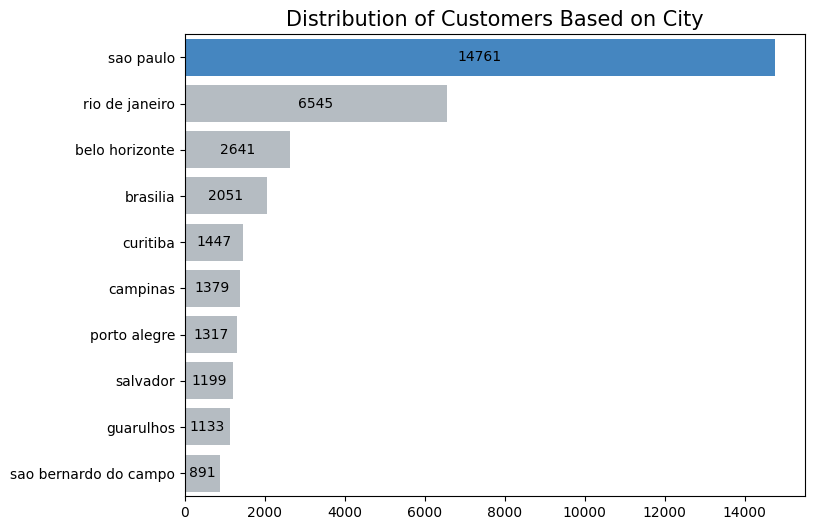

In [58]:
fig, ax = plt.subplots(figsize=(8, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x = "customer_unique_id", y ="customer_city", data = customer_city.head(10), palette = colors, ax = ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Distribution of Customers Based on City", loc = "center", fontsize = 15)
for i in range(0, len(ax.containers)):
    ax.bar_label(ax.containers[i], label_type='center')

plt.show()

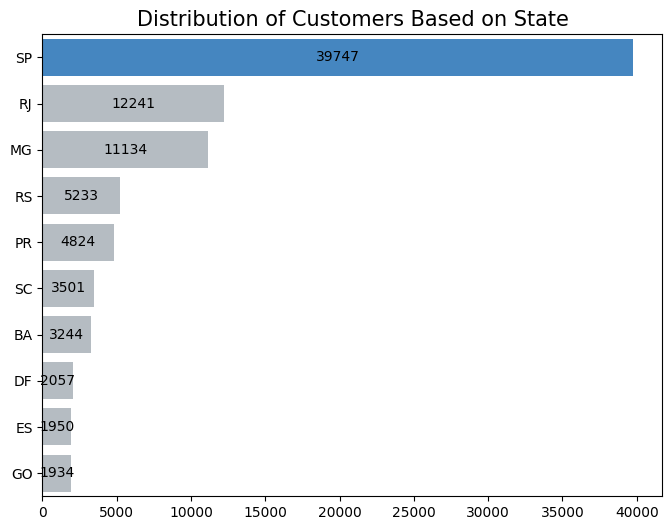

In [59]:
fig, ax = plt.subplots(figsize=(8, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x = "customer_unique_id", y ="customer_state", data = customer_state.head(10), palette = colors, ax = ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Distribution of Customers Based on State", loc = "center", fontsize = 15)
for i in range(0, len(ax.containers)):
    ax.bar_label(ax.containers[i], label_type='center')

plt.show()

### Siapa pelanggan yang paling banyak melakukan order dan mengeluarkan uang untuk order tersebut?

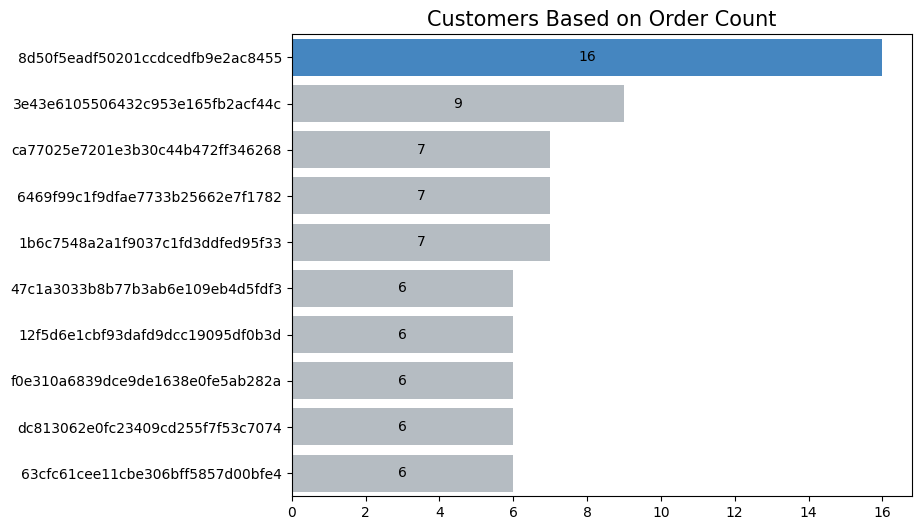

In [60]:
fig, ax = plt.subplots(figsize=(8, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x = "count_order", y = "customer_unique_id", data = customer_count_order_sorted.head(10), palette = colors, ax = ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Customers Based on Order Count", loc = "center", fontsize = 15)
for i in range(0, len(ax.containers)):
    ax.bar_label(ax.containers[i], label_type='center')

plt.show()

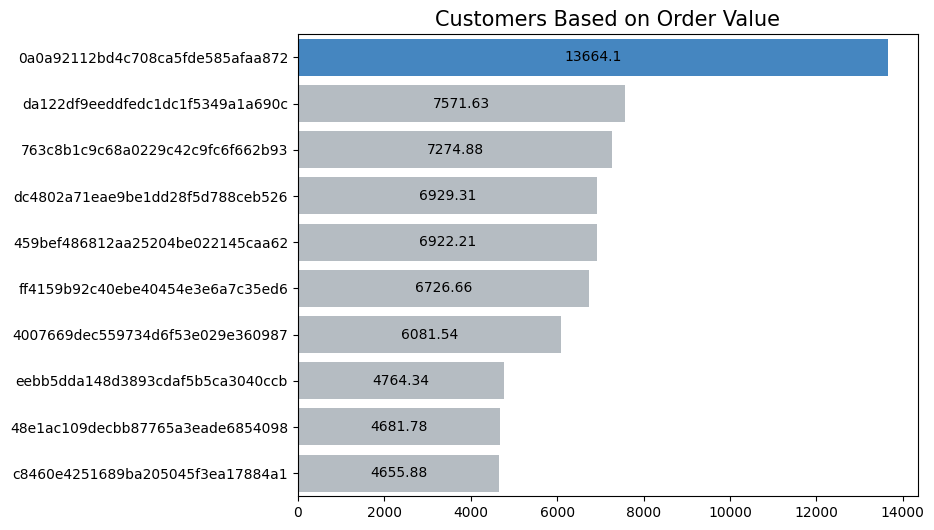

In [61]:
fig, ax = plt.subplots(figsize=(8, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x = "sum_order_value", y = "customer_unique_id", data = customer_sum_order_value_sorted.head(10), palette = colors, ax = ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Customers Based on Order Value", loc = "center", fontsize = 15)
for i in range(0, len(ax.containers)):
    ax.bar_label(ax.containers[i], label_type='center')

plt.show()

### Bagaimana persebaran pelanggan yang memiliki dampak terhadap order?

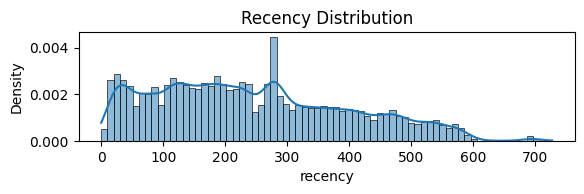

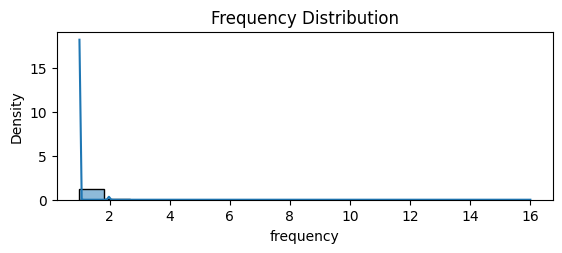

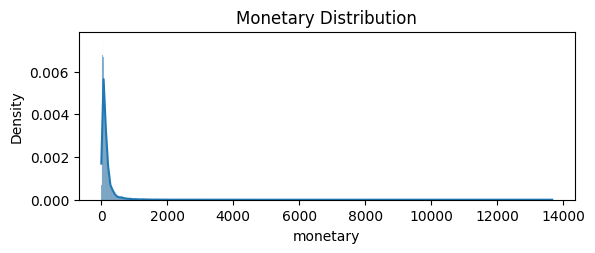

In [62]:
# Recency
fig = plt.subplot(3, 1, 1)
sns.histplot(rfm_df["recency"], kde=True, stat="density")
plt.title("Recency Distribution")
plt.show()

# Frequency
fig = plt.subplot(2, 1, 1)
sns.histplot(rfm_df["frequency"], kde=True, stat="density")
plt.title("Frequency Distribution")
plt.show()

# Monetary
fig = plt.subplot(2, 1, 1)
sns.histplot(rfm_df["monetary"], kde=True, stat="density")
plt.title("Monetary Distribution")
plt.show()

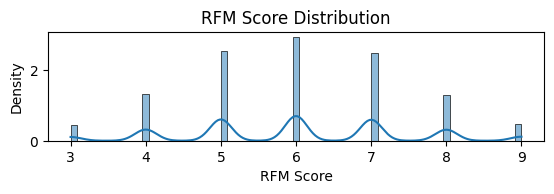

In [63]:
# RFM Score
plt.subplot(3, 1, 2)
sns.histplot(rfm_df["rfm_score"], kde=True, stat="density")
plt.title("RFM Score Distribution")
plt.xlabel("RFM Score")
plt.show()

### Bagaimana persebaran penjual berdasarkan kota dan negara bagian?

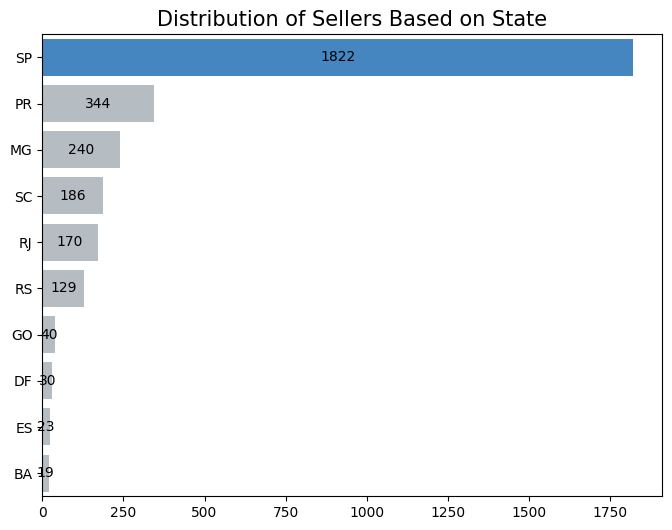

In [64]:
fig, ax = plt.subplots(figsize=(8, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x = "seller_id", y ="seller_state", data = seller_state.head(10), palette = colors, ax = ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Distribution of Sellers Based on State", loc = "center", fontsize = 15)
for i in range(0, len(ax.containers)):
    ax.bar_label(ax.containers[i], label_type='center')

plt.show()

### Siapa penjual yang paling banyak mendapatkan order dan mendapatkan uang untuk order tersebut?

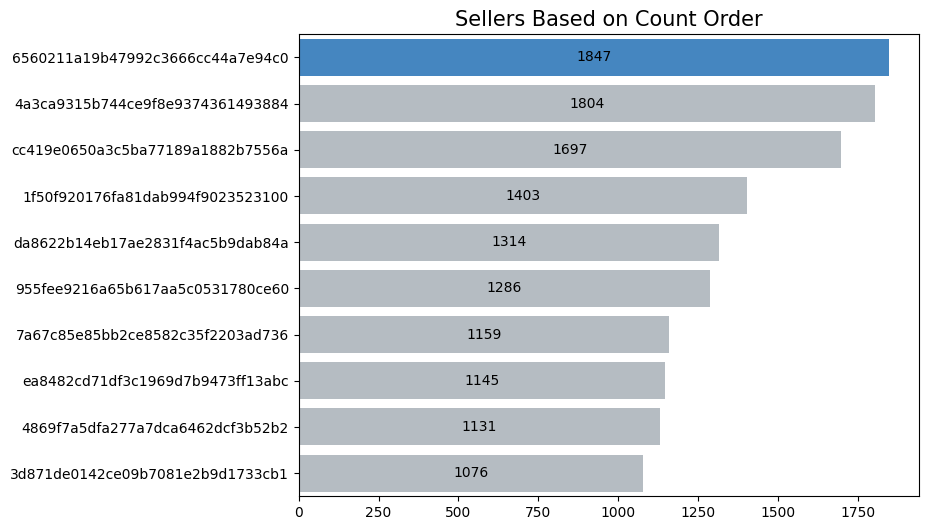

In [65]:
fig, ax = plt.subplots(figsize=(8, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x = "count_order", y = "seller_id", data = seller_count_order_sorted.head(10), palette = colors, ax = ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Sellers Based on Count Order", loc = "center", fontsize = 15)
for i in range(0, len(ax.containers)):
    ax.bar_label(ax.containers[i], label_type='center')

plt.show()

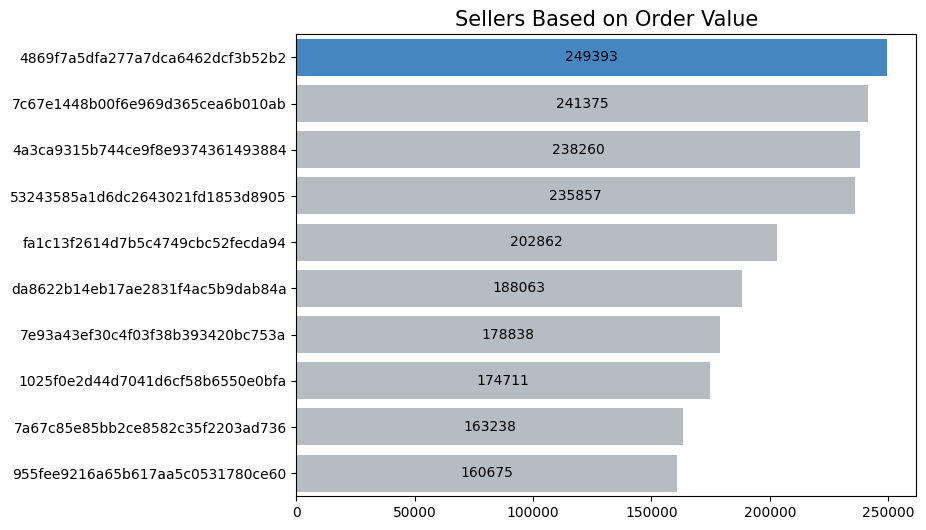

In [66]:
fig, ax = plt.subplots(figsize=(8, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x = "sum_order_value", y = "seller_id", data = seller_sum_order_value_sorted.head(10), palette = colors, ax = ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Sellers Based on Order Value", loc = "center", fontsize = 15)
for i in range(0, len(ax.containers)):
    ax.bar_label(ax.containers[i], label_type='center')

plt.show()

### Apa produk dan kategori produk yang paling banyak mendapatkan order serta menghasilkan uang untuk order tersebut?

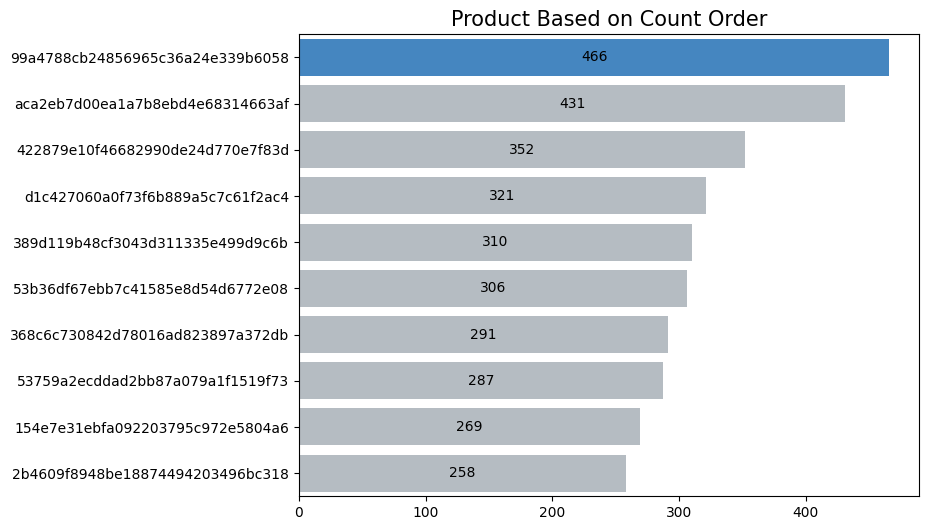

In [67]:
fig, ax = plt.subplots(figsize=(8, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x = "count_order", y = "product_id", data = product_count_order_sorted.head(10), palette = colors, ax = ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Product Based on Count Order", loc = "center", fontsize = 15)
for i in range(0, len(ax.containers)):
    ax.bar_label(ax.containers[i], label_type='center')

plt.show()

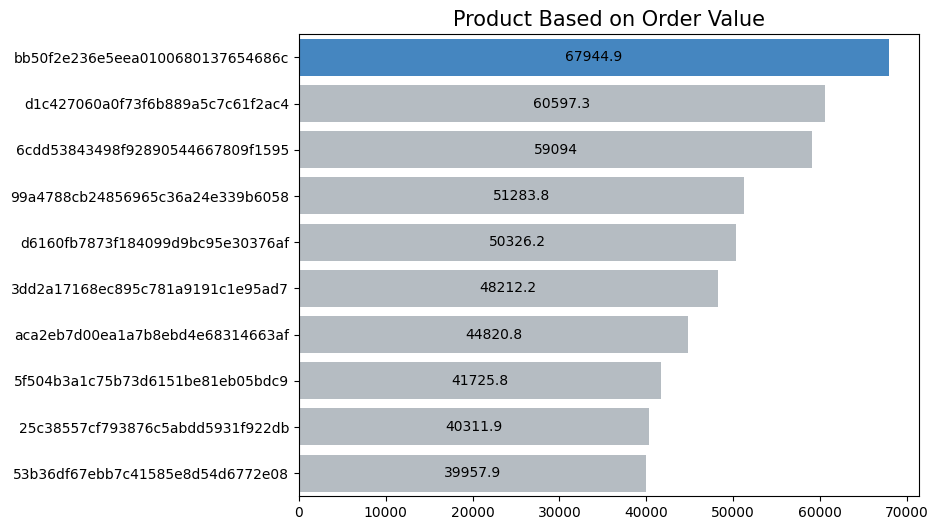

In [68]:
fig, ax = plt.subplots(figsize=(8, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x = "sum_order_value", y = "product_id", data = product_sum_order_value_sorted.head(10), palette = colors, ax = ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Product Based on Order Value", loc = "center", fontsize = 15)
for i in range(0, len(ax.containers)):
    ax.bar_label(ax.containers[i], label_type='center')

plt.show()

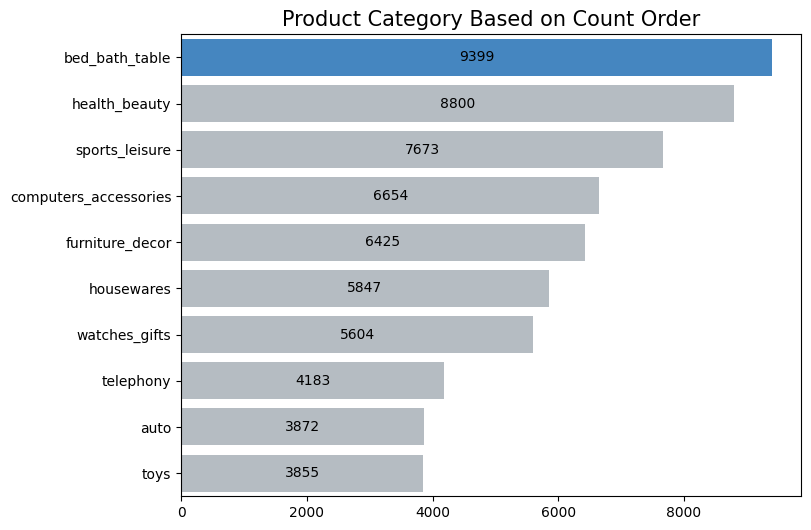

In [69]:
fig, ax = plt.subplots(figsize=(8, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x = "count_order", y = "product_category_name_english", data = product_category_count_order_sorted.head(10), palette = colors, ax = ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Product Category Based on Count Order", loc = "center", fontsize = 15)
for i in range(0, len(ax.containers)):
    ax.bar_label(ax.containers[i], label_type='center')

plt.show()

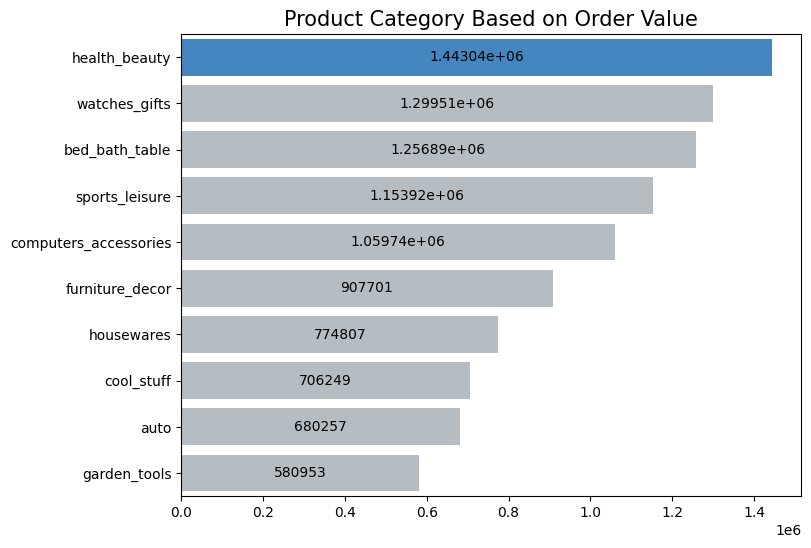

In [70]:
fig, ax = plt.subplots(figsize=(8, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x = "sum_order_value", y = "product_category_name_english", data = product_category_sum_order_value_sorted.head(10), palette = colors, ax = ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Product Category Based on Order Value", loc = "center", fontsize = 15)
for i in range(0, len(ax.containers)):
    ax.bar_label(ax.containers[i], label_type='center')

plt.show()

## Conclusion

- Kota Sao Paulo memiliki jumlah pelanggan terbanyak sebesar 14,761 individu. Di sisi lain, negara bagian SP memiliki jumlah pelanggan terbanyak sebesar 39,747 individu.
- Pelanggan yang paling banyak melakukan order adalah pelanggan dengan Unique ID "8d50f5eadf50201ccdcedfb9e2ac8455", dengan 16 total order dan 902.04 pengeluaran untuk order tersebut. Sedangkan, pelanggan yang paling banyak mengeluarkan uang untuk order adalah pelanggan dengan Unique ID "0a0a92112bd4c708ca5fde585afaa872", dengan 1 total order dan 13664.08 pengeluaran untuk order tersebut.
- Persebaran pelanggan dengan dampak terhadap order ditandai dengan nilai RFM di antara 3 sampai 9, dimana terdapat 3921 pelanggan yang memiliki nilai RFM sebesar 9 yang menandakan bahwa pelanggan tersebut sangat berdampak terhadap proses order yang didasarkan atas Recency, Frequency, dan Monetary.

- Kota Sao Paulo memiliki jumlah penjual terbanyak sebesar 682 individu. Di sisi lain, negara bagian SP memiliki jumlah penjual terbanyak sebesar 1,822 individu.
- Penjual yang paling banyak mendapatkan order adalah penjual dengan Unique ID "6560211a19b47992c3666cc44a7e94c0", dengan 1847 total order dan 150892.38 pemasukan untuk order tersebut. Sedangkan, penjual yang paling banyak mendapatkan uang untuk order adalah penjual dengan Unique ID "4869f7a5dfa277a7dca6462dcf3b52b2", dengan 1131 total order dan 249393.44 pemasukan untuk order tersebut.

- Produk yang paling banyak mendapatkan order adalah produk dengan Unique ID "99a4788cb24856965c36a24e339b6058", dengan 466 total order dan 51283.85 pemasukan untuk order tersebut. Sedangkan, yang paling banyak mendapatkan uang untuk order adalah produk dengan Unique ID "bb50f2e236e5eea0100680137654686c", dengan 187 total order dan 67944.87 pemasukan untuk order tersebut. Di sisi lain, kategori produk yang paling banyak mendapatkan order adalah kategori produk bed bath table, dengan 9399 total order dan 1256893.92 pemasukan untuk order tersebut. Sedangkan, yang paling banyak mendapatkan uang untuk order adalah kategori produk health beauthy, dengan 8800  total order dan 1443039.79 pemasukan untuk order tersebut.